In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('result1201.csv')

In [66]:
original_cols = list(df.columns)
new_cols = []

# 컬럼 공백 제거 및 소문자 변형
for col in original_cols:
    new_cols.append(col.strip().replace('  ', ' '))
df.columns = new_cols

In [67]:
# Showing The Shape of The Data
print("The Shape of The Data: ", df.shape)

The Shape of The Data:  (2655, 20)


In [69]:
df.head(2)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263,62,0.01,71.279624,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [70]:
df = df.join(pd.get_dummies(df['Status'])).drop(columns='Status').copy()

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'status' 컬럼을 Label 인코딩
df['Status_encoded'] = label_encoder.fit_transform(df['Status'])

# 결과 확인
print(df[['Status', 'Status_encoded']])

In [71]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,65.0,263,62,0.01,71.279624,1154,19.1,83,6,...,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,2014,59.9,271,64,0.01,73.523582,492,18.6,86,58,...,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,2013,59.9,268,66,0.01,73.219243,430,18.1,89,62,...,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,2012,59.5,272,69,0.01,78.184215,2787,17.6,93,67,...,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,2011,59.2,275,71,0.01,7.097109,3013,17.2,97,68,...,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2004,44.3,723,27,4.36,0.000000,31,27.1,42,67,...,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,False,True
2651,2003,44.5,715,26,4.06,0.000000,998,26.7,41,7,...,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,False,True
2652,2002,44.8,73,25,4.43,0.000000,304,26.3,40,73,...,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,False,True
2653,2001,45.3,686,25,1.72,0.000000,529,25.9,39,76,...,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,False,True


<Axes: >

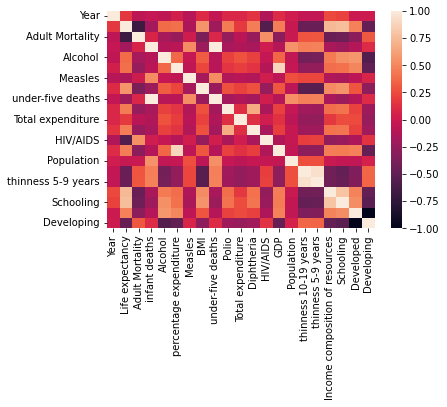

In [72]:
sns.heatmap(df.corr())

In [73]:
corr_matrix = df.corr()

# 'life expectancy'와의 상관계수 확인
life_expectancy_corr = corr_matrix['Life expectancy']

# 절댓값을 취해 양의 상관계수가 높은 5개 쌍을 찾음
top_corr_with_life_expectancy = life_expectancy_corr.abs().sort_values(ascending=False).head(6)

# 자기 자신인 'life expectancy'는 제외
top_corr_with_life_expectancy = top_corr_with_life_expectancy[1:]

print("Top 5 Features with High Positive Correlation with Life Expectancy:")
print(top_corr_with_life_expectancy)

Top 5 Features with High Positive Correlation with Life Expectancy:
Schooling                          0.758451
Income composition of resources    0.734500
Adult Mortality                    0.679542
HIV/AIDS                           0.568485
BMI                                0.556571
Name: Life expectancy, dtype: float64


In [74]:
corr_with_life_expectancy = life_expectancy_corr.abs().sort_values(ascending=False)
corr_with_life_expectancy = corr_with_life_expectancy[1:]

print("Features with High Positive Correlation with Life Expectancy:")
print(corr_with_life_expectancy)

Features with High Positive Correlation with Life Expectancy:
Schooling                          0.758451
Income composition of resources    0.734500
Adult Mortality                    0.679542
HIV/AIDS                           0.568485
BMI                                0.556571
Developing                         0.475984
Developed                          0.475984
GDP                                0.458584
thinness 10-19 years               0.458084
Diphtheria                         0.457039
thinness 5-9 years                 0.453338
Polio                              0.449457
percentage expenditure             0.397807
Alcohol                            0.379485
under-five deaths                  0.207644
infant deaths                      0.182355
Total expenditure                  0.174996
Year                               0.170251
Measles                            0.145572
Population                         0.020946
Name: Life expectancy, dtype: float64


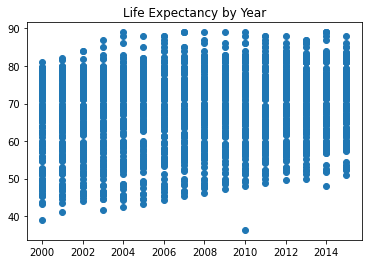

In [75]:
plt.scatter('Year', 'Life expectancy', data=df, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

In [76]:
df.head(3)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,2015,65.0,263,62,0.01,71.279624,1154,19.1,83,6,...,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,2014,59.9,271,64,0.01,73.523582,492,18.6,86,58,...,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,2013,59.9,268,66,0.01,73.219243,430,18.1,89,62,...,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True


In [78]:
df.iloc[:, 2:].corr().iloc[:, -2:].T

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Developed,-0.299157,-0.107382,0.565456,0.493666,-0.071574,0.283591,-0.109362,0.213995,0.247681,0.198032,-0.143234,0.471981,-0.050213,-0.351653,-0.350355,0.481588,0.526595,1.0,-1.0
Developing,0.299157,0.107382,-0.565456,-0.493666,0.071574,-0.283591,0.109362,-0.213995,-0.247681,-0.198032,0.143234,-0.471981,0.050213,0.351653,0.350355,-0.481588,-0.526595,-1.0,1.0


In [79]:
df.drop(columns=['Year'], inplace=True)

categorical columns, 'year' will be dropped as they don't have significant differences among life expectancy.

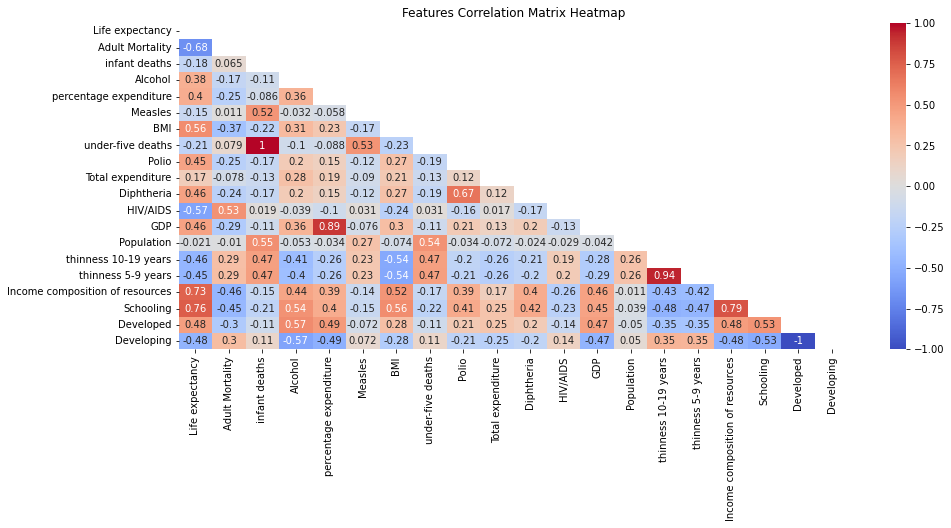

In [80]:
def feat_heatmap():
    mask = np.triu(df.corr())
    plt.figure(figsize=(15,6))
    sns.heatmap(df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(len(df.columns), 0)
    plt.title('Features Correlation Matrix Heatmap')
    plt.show()
feat_heatmap()

- Infant Deaths/Under Five Deaths (drop Infant Deaths)
- GDP/Percentage Expenditure (drop Percentage Expenditure)
- Thinness 5-9/Thinness 10-19 (drop Thinness 10-19)
- Income Composition of Resources/Schooling (drop Schooling)
- Developing/Developed (drop Developing - these two are the same just opposite of one another)

> Developing, Developed column으로 다음에 해볼까 => LabelEncoder 말고 One-Hot으로 다시

In [81]:
df.drop(columns=['infant deaths', 'percentage expenditure','thinness 10-19 years','Schooling', 'Developing'], inplace=True)

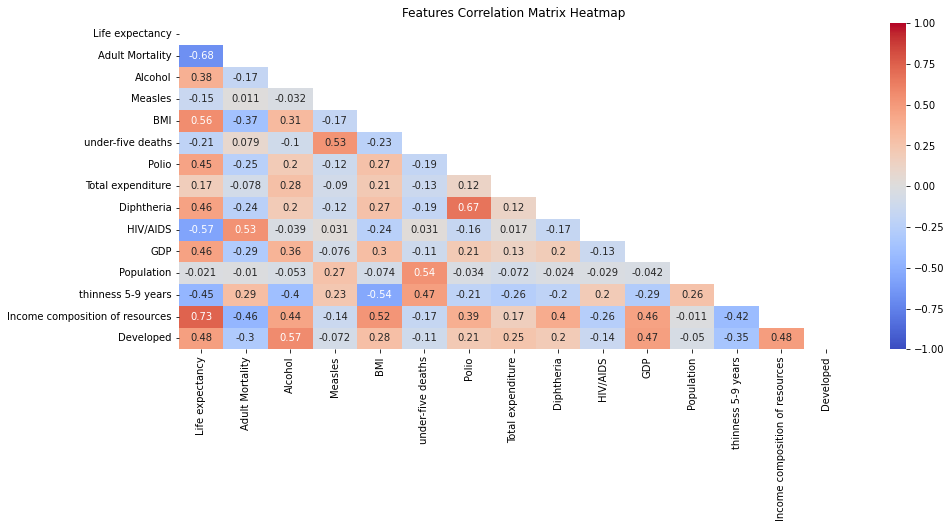

In [82]:
feat_heatmap()

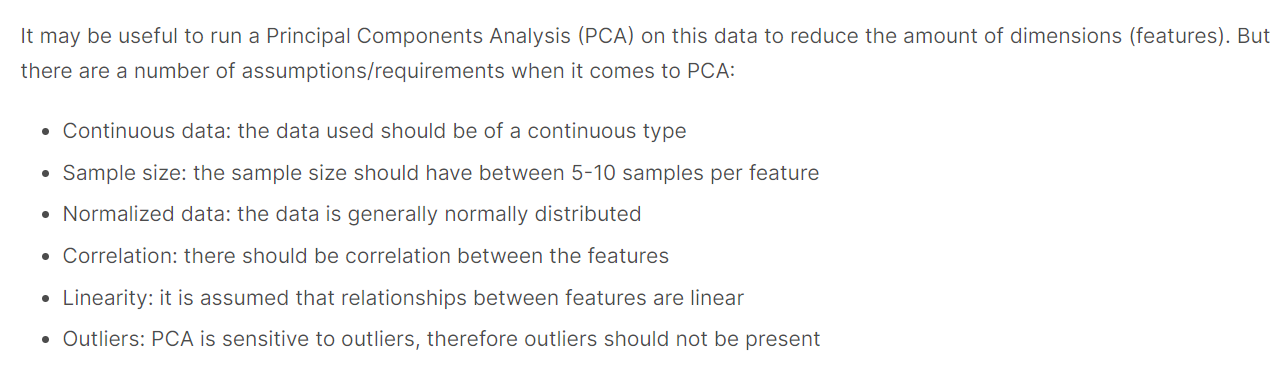

> The features set currently satisfies 3 of the above assumptions: sample size, correlation, outliers. 
- The linearity assumption may not be true, the data is not currently normalized and not all the data is continuous 

In [83]:
df.drop(columns='Life expectancy', inplace=True)

In [84]:
len(df.columns)

14

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X = scale(df)
sklearn_pca = PCA()
Y = sklearn_pca.fit_transform(X)
print('Explained variance by Principal Components:', sklearn_pca.explained_variance_ratio_)
print('Eigenvalues:', sklearn_pca.explained_variance_)

Explained variance by Principal Components: [0.29824359 0.13525703 0.10124459 0.08784114 0.06405634 0.05426716
 0.05232424 0.04402913 0.03407351 0.03070401 0.02781997 0.02623135
 0.02314718 0.02076075]
Eigenvalues: [4.17698355 1.89431193 1.4179584  1.23023928 0.89712664 0.7600265
 0.73281541 0.6166401  0.47720892 0.43001811 0.38962628 0.36737723
 0.32418269 0.29076002]


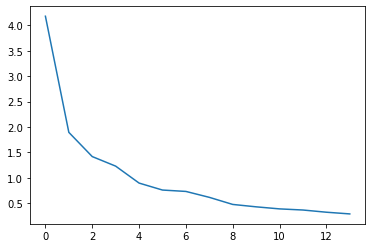

PC1 Explained Variance: 29.82%


In [86]:
plt.plot(sklearn_pca.explained_variance_)
plt.show()
print('PC1 Explained Variance:', str(round(sklearn_pca.explained_variance_ratio_[0]*100, 2))+'%')

Based on the scree plot above, it would suggest that only PC1 be kept, this is likely not a great idea as PC1 only accounts for 29.82% of the total variance of the variables.

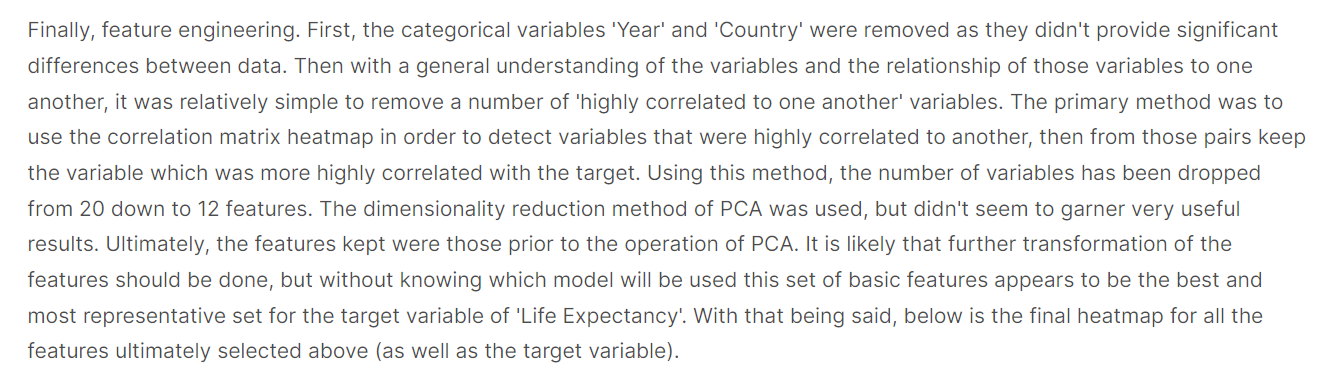